## Feed Forward Neural Network - Multiclass Classification

In [2]:
from torch.nn import Linear, ReLU, Module, Flatten, Sequential, CrossEntropyLoss, Softmax, Conv2d, MaxPool2d
from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST, CIFAR10
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch

In [3]:
class FFNN_model(Module):
     def __init__(self):
         super().__init__()
         self.sequential = Sequential(
             Flatten(),
             Linear(28*28, 128),
             ReLU(),
             Linear(128, 32),
             ReLU(),
             Linear(32, 10)
         )

     def __call__(self, x): # default method is 'forward'
         return self.layer(x)

     def layer(self, x):
          x = self.sequential(x)
          return x

In [4]:
my_model = FFNN_model().to("cpu")
loss_func = CrossEntropyLoss()
optimizer = Adam(params = my_model.parameters(), lr = 0.001)

In [5]:
train_dataset = MNIST(
    root = ".",
    train = True,
    transform = ToTensor(),
    download = True
)
test_dataset = MNIST(
    root = ".",
    train = False,
    transform = ToTensor(),
    download = True
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 38.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.03MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.41MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.4MB/s]


In [6]:
train_dataset.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [7]:
train = DataLoader(
    train_dataset,
    batch_size = 32,
    shuffle = True
)

test = DataLoader(
    train_dataset,
    batch_size = 32,
    shuffle = True
)

In [9]:
train_dataset[0][0].shape # in the model we use this 28*28 as input shape for the first Linear layer

torch.Size([1, 28, 28])

In [10]:
def train_model(model, loss_func, optimizer, train):
    size = len(train.dataset)
    for batch, (x, y) in enumerate(train):
        x, y = x.to("cpu"), y.to("cpu")
        pred = model(x)
        loss = loss_func(pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if batch%100 ==0:
          loss_r, current = loss.item(), (batch+1)*len(x)
          print(f"loss : {loss_r} | current : [{current}%{size}]")

def test_model(model, loss_func, test):
    size = len(test.dataset)
    no_of_batched = len(test)
    model.eval()
    loss_col, acc_col = 0, 0
    with torch.no_grad():
        for x, y in test:
            x, y =  x.to("cpu"), y.to("cpu")
            pred = model(x)
            loss_col += loss_func(pred, y).item()
            acc_col += (pred.argmax(dim=1)==y).sum().item()
        total_loss = loss_col/no_of_batched
        total_accuracy = acc_col/size
        print(f"loss : {total_loss} | accuracy : {total_accuracy*100}")


In [11]:
epoch = 5
for i in range(1,epoch+1):
   print(f"no of epochs : {i}")
   print(train_model(my_model, loss_func, optimizer, train))
   print(test_model(my_model, loss_func, test))


no of epochs : 1
loss : 2.3061864376068115 | current : [32%60000]
loss : 0.5458373427391052 | current : [3232%60000]
loss : 0.6252285242080688 | current : [6432%60000]
loss : 0.3034828305244446 | current : [9632%60000]
loss : 0.16829726099967957 | current : [12832%60000]
loss : 0.1337718963623047 | current : [16032%60000]
loss : 0.22972984611988068 | current : [19232%60000]
loss : 0.1713750958442688 | current : [22432%60000]
loss : 0.12054076045751572 | current : [25632%60000]
loss : 0.39627805352211 | current : [28832%60000]
loss : 0.2515765130519867 | current : [32032%60000]
loss : 0.3056383728981018 | current : [35232%60000]
loss : 0.20347176492214203 | current : [38432%60000]
loss : 0.3416380286216736 | current : [41632%60000]
loss : 0.050533127039670944 | current : [44832%60000]
loss : 0.22162239253520966 | current : [48032%60000]
loss : 0.17851611971855164 | current : [51232%60000]
loss : 0.1820870339870453 | current : [54432%60000]
loss : 0.10043855011463165 | current : [57632%6

In [20]:
import numpy as np
import matplotlib.pyplot as plt

random = np.random.randint(100)
x, y = train.dataset[random]

Prediction : 5


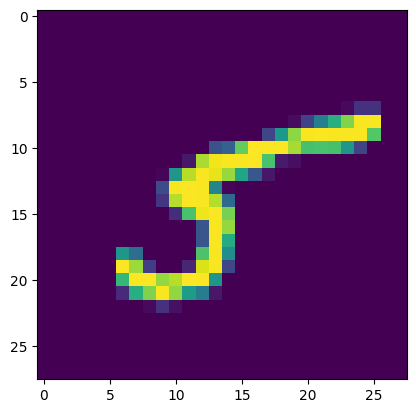

In [24]:
plt.imshow(x.squeeze())
print(f"Prediction : {y}")

## Convolutional Neural Network - Multiclass Classification

In [25]:
train_dataset = CIFAR10(
    root = ".",
    train = True,
    transform = ToTensor(),
    download = True
)
test_dataset = CIFAR10(
    root = ".",
    train = False,
    transform = ToTensor(),
    download = True
)

100%|██████████| 170M/170M [00:03<00:00, 47.4MB/s]


In [26]:
train_dataset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [31]:
x, y = train_dataset[0]

In [32]:
x.shape

torch.Size([3, 32, 32])

In [38]:
class CNN_model(Module):
     def __init__(self):
         super().__init__()
         self.sequential = Sequential(
             Conv2d(in_channels = 3, out_channels = 6, kernel_size = 3, stride = 1),
             ReLU(),
             MaxPool2d(kernel_size = 2, stride = 2),
             Flatten(),
             Linear(in_features = 1350, out_features = 128),
             ReLU(),
             Linear(128, 32),
             ReLU(),
             Linear(32, 10)
         )

     def __call__(self, x): # default method is 'forward'
         return self.layer(x)

     def layer(self, x):
          x = self.sequential(x)
          return x

In [39]:
train = DataLoader(
    train_dataset,
    batch_size = 32,
    shuffle = True
)

test = DataLoader(
    train_dataset,
    batch_size = 32,
    shuffle = True
)


In [40]:
my_model = CNN_model().to("cpu")
loss_func = CrossEntropyLoss()
optimizer = Adam(params = my_model.parameters(), lr = 0.001)

In [41]:
def train_model(model, loss_func, optimizer, train):
    size = len(train.dataset)
    for batch, (x, y) in enumerate(train):
        x, y = x.to("cpu"), y.to("cpu")
        pred = model(x)
        loss = loss_func(pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if batch%100 ==0:
          loss_r, current = loss.item(), (batch+1)*len(x)
          print(f"loss : {loss_r} | current : [{current}%{size}]")

def test_model(model, loss_func, test):
    size = len(test.dataset)
    no_of_batched = len(test)
    model.eval()
    loss_col, acc_col = 0, 0
    with torch.no_grad():
        for x, y in test:
            x, y =  x.to("cpu"), y.to("cpu")
            pred = model(x)
            loss_col += loss_func(pred, y).item()
            acc_col += (pred.argmax(dim=1)==y).sum().item()
        total_loss = loss_col/no_of_batched
        total_accuracy = acc_col/size
        print(f"loss : {total_loss} | accuracy : {total_accuracy*100}")

In [42]:
epoch = 5
for i in range(1,epoch+1):
   print(f"no of epochs : {i}")
   print(train_model(my_model, loss_func, optimizer, train))
   print(test_model(my_model, loss_func, test))


no of epochs : 1
loss : 2.2860705852508545 | current : [32%50000]
loss : 2.165945053100586 | current : [3232%50000]
loss : 1.8893252611160278 | current : [6432%50000]
loss : 1.690902829170227 | current : [9632%50000]
loss : 1.5592530965805054 | current : [12832%50000]
loss : 1.5673021078109741 | current : [16032%50000]
loss : 1.592211127281189 | current : [19232%50000]
loss : 1.735703706741333 | current : [22432%50000]
loss : 1.6448804140090942 | current : [25632%50000]
loss : 1.3921595811843872 | current : [28832%50000]
loss : 1.762345552444458 | current : [32032%50000]
loss : 1.3387959003448486 | current : [35232%50000]
loss : 1.664212703704834 | current : [38432%50000]
loss : 1.4668848514556885 | current : [41632%50000]
loss : 1.890487551689148 | current : [44832%50000]
loss : 1.7101234197616577 | current : [48032%50000]
None
loss : 1.5060437322806945 | accuracy : 45.862
None
no of epochs : 2
loss : 1.5998725891113281 | current : [32%50000]
loss : 1.4367024898529053 | current : [323

### accuracy is low beacuse of no proper image transformation and small no of epochs ***https://docs.pytorch.org/vision/stable/transforms.html***

### apply callback function like early stopping to find best model ***https://docs.pytorch.org/ignite/generated/ignite.handlers.early_stopping.EarlyStopping.html***

In [43]:
my_model

CNN_model(
  (sequential): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Flatten(start_dim=1, end_dim=-1)
    (4): Linear(in_features=1350, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [45]:
random = np.random.randint(100)
x, y = train.dataset[random]

In [47]:
x.shape

torch.Size([3, 32, 32])

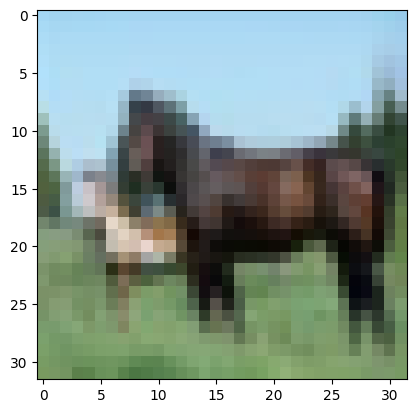

Prediction : horse


In [55]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(x)

for k, v in train_dataset.class_to_idx.items():
    if v == y:
       print(f"Prediction : {k}")
       break


# Experiment multiclass classification with RNN, LSTM, GRU also
